In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import torch
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm

sys.path.append('../src')
from base import buildmethod, checkmethod, HotTopic, VAE
from ntm import GSM
from qae import VQAE
from sim import make_dataset
from utils import get_kwargs, kmeans, show_dataset, shuffle

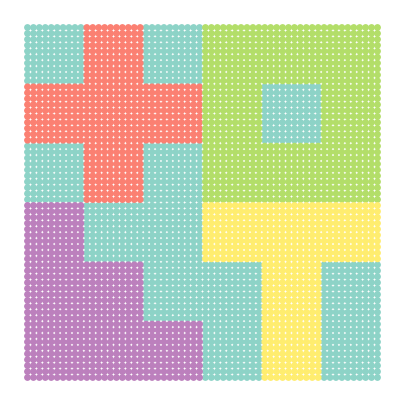

In [2]:
data, labels = make_dataset(return_tensor=True)
show_dataset(data, labels)

VAE: 100%|██████████| 200/200 [00:13<00:00, 14.91it/s]


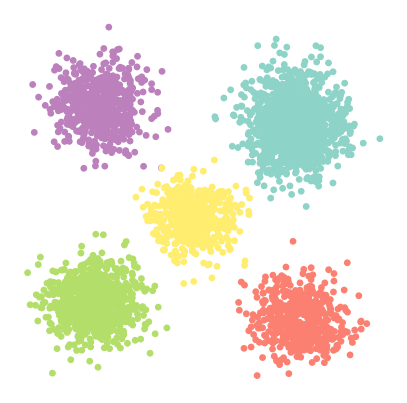

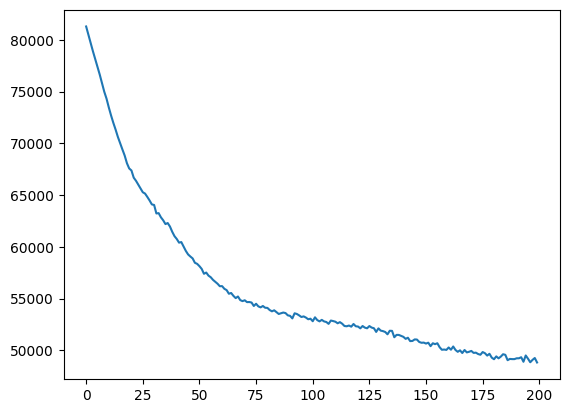

In [3]:
model = VAE((64, 2))
z = model.fit_transform(data)
show_dataset(z, labels, sectioned=False)
plt.show()
plt.plot(range(len(model.log_)), model.log_)
plt.show()

GSM: 100%|██████████| 200/200 [00:11<00:00, 16.91it/s]


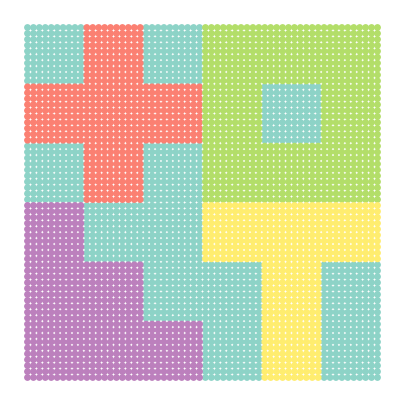

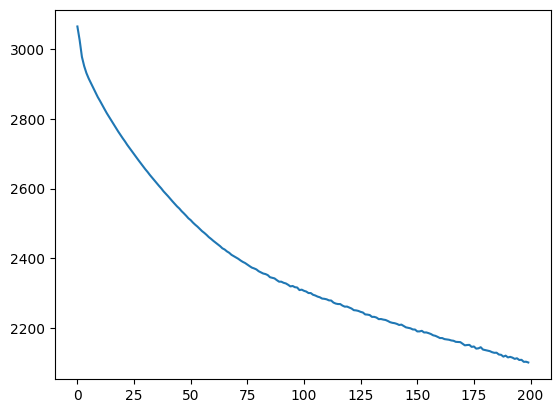

In [4]:
model = GSM()
topics = model.fit_predict(data[:, 3:])
show_dataset(data, topics)
plt.show()
plt.plot(range(len(model.log_)), model.log_)
plt.show()